In [6]:
# 导入库和数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  # 分类树+可视化
from sklearn.metrics import accuracy_score, classification_report

In [7]:
# 加载数据集
iris = load_iris()
x = iris.data
y = iris.target

# 数据集分割
# 添加 stratify=y，确保训练集和测试集的类别比例与原始数据一致
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y )
print(y)
print("测试集的数据类别：\n",y_test)
print("训练集的数据类别：\n",y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
测试集的数据类别：
 [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
训练集的数据类别：
 [0 2 1 0 1 2 1 2 2 2 2 1 1 1 1 0 0 2 2 0 1 0 2 0 1 2 2 0 2 0 0 1 1 0 2 2 1
 1 2 1 0 1 0 2 0 0 2 0 0 0 0 1 2 1 0 2 1 2 0 2 0 1 2 0 1 1 2 1 1 2 0 0 0 2
 1 2 1 2 2 1 0 2 1 0 2 0 2 1 1 0 1 2 0 0 2 2 2 1 2 0 2 1 2 2 0 1 1 1 1 1 0
 2 1 1 0 0 0 0 1 0]


In [8]:
dt_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    min_samples_split=2,
    max_leaf_nodes=3,
    random_state=42
)

dt_clf.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,3
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
# 预测
y_pred = dt_clf.predict(x_test)

print("分类准确率：", accuracy_score(y_test, y_pred)) 
print("\n分类报告（Precision/Recall/F1）：")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

分类准确率： 0.9333333333333333

分类报告（Precision/Recall/F1）：
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [10]:
import numpy as np

# 查看测试集真实标签的类别
true_classes = np.unique(y_test)
# 查看模型预测标签的类别
pred_classes = np.unique(y_pred)
pred_classes

array([0, 1, 2])

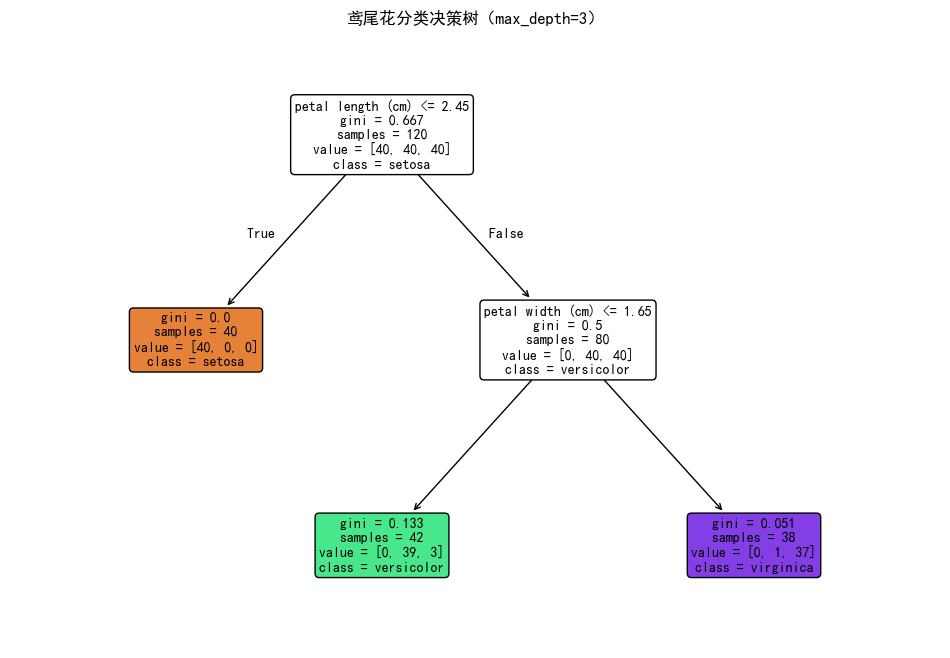

In [12]:
# 设置中文显示
plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 绘制决策树
plt.figure(figsize=(12, 8))  # 画布大小
plot_tree(
    dt_clf,
    feature_names=iris.feature_names,  # 特征名称
    class_names=iris.target_names,     # 类别名称
    filled=True,                       # 用颜色填充节点（纯度越高颜色越深）
    rounded=True,                      # 节点圆角
    fontsize=10
)
plt.title("鸢尾花分类决策树（max_depth=3）")
plt.show()